In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(256, 256, 3)


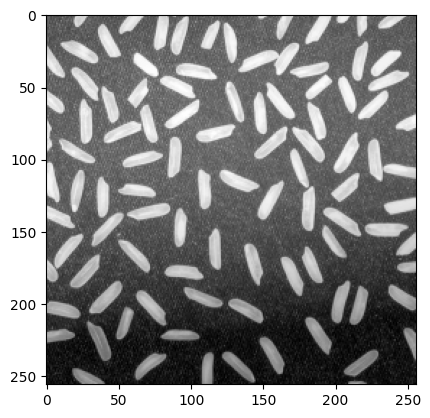

In [ ]:
img = cv2.imread('/content/drive/MyDrive/IP/Images/rice.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gImg, cmap='gray')
# cv2_imshow(gImg)

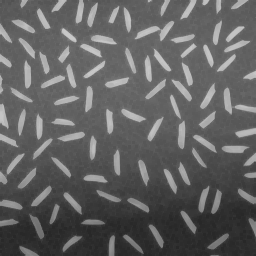

In [ ]:
kernel = np.ones((3,3), np.uint8)
erosion= cv2.erode(gImg, kernel, iterations=1)
cv2_imshow(erosion)

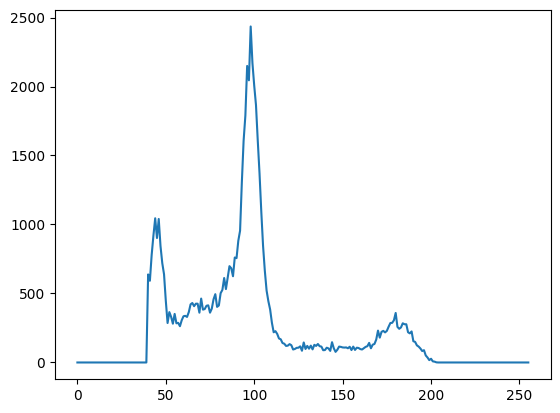

In [ ]:
hist = cv2.calcHist([erosion], [0], None, [256], [0, 256])
plt.plot(hist)

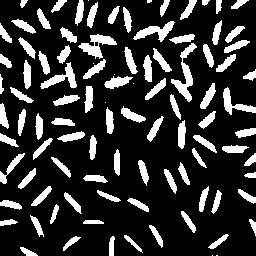

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.uint8)

threshold = 110

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if erosion[i][j] > threshold:
      gBin[i][j] = 255

cv2_imshow(gBin)

In [ ]:
num_labels, labels = cv2.connectedComponents(gBin, connectivity=8)
print(num_labels)

100


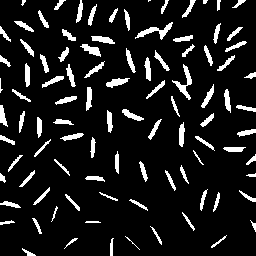

In [ ]:
kernel = np.ones((3,3), np.uint8)
erosion= cv2.erode(gBin, kernel, iterations=1)
cv2_imshow(erosion)

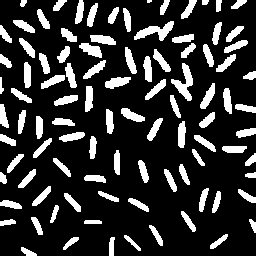

In [ ]:
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(erosion, kernel, iterations=1)
cv2_imshow(dilate)

In [ ]:
num_labels, labels = cv2.connectedComponents(dilate, connectivity=8)
print(num_labels)

98


(480, 1622, 3)


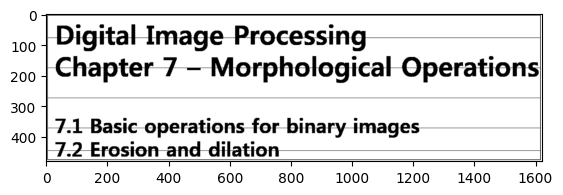

In [41]:
img = cv2.imread('/content/drive/MyDrive/IP/Images/scanimg.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gImg, cmap='gray')
# cv2_imshow(gImg)

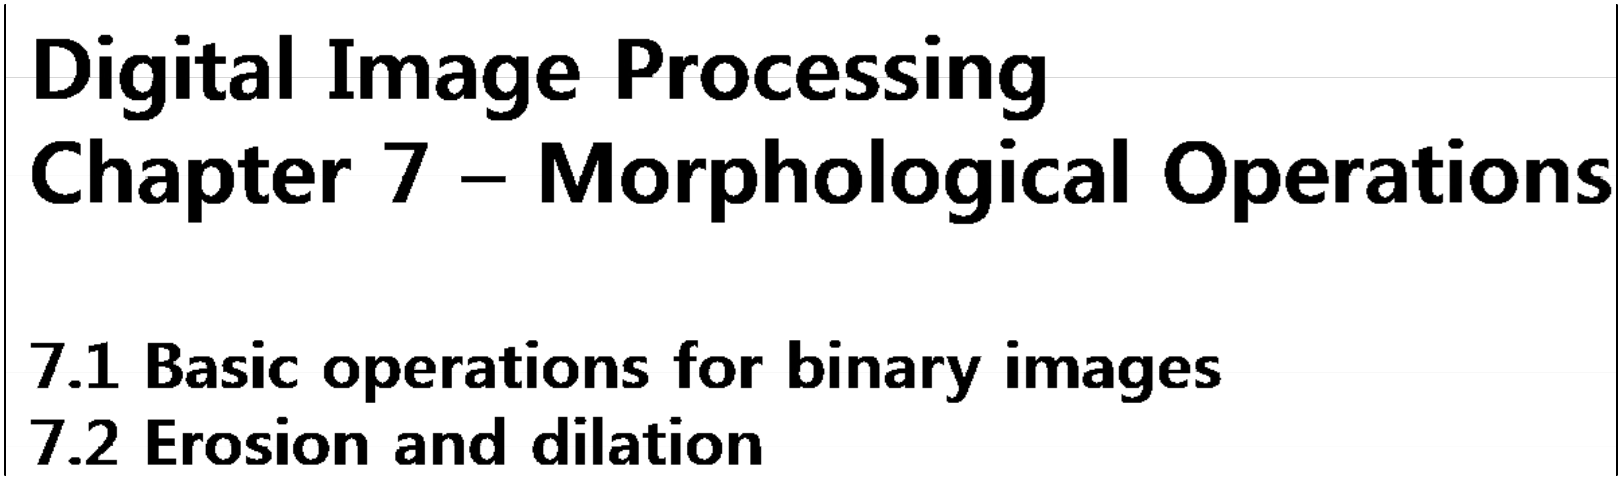

In [37]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gImg, kernel, iterations=1)
cv2_imshow(dilate)

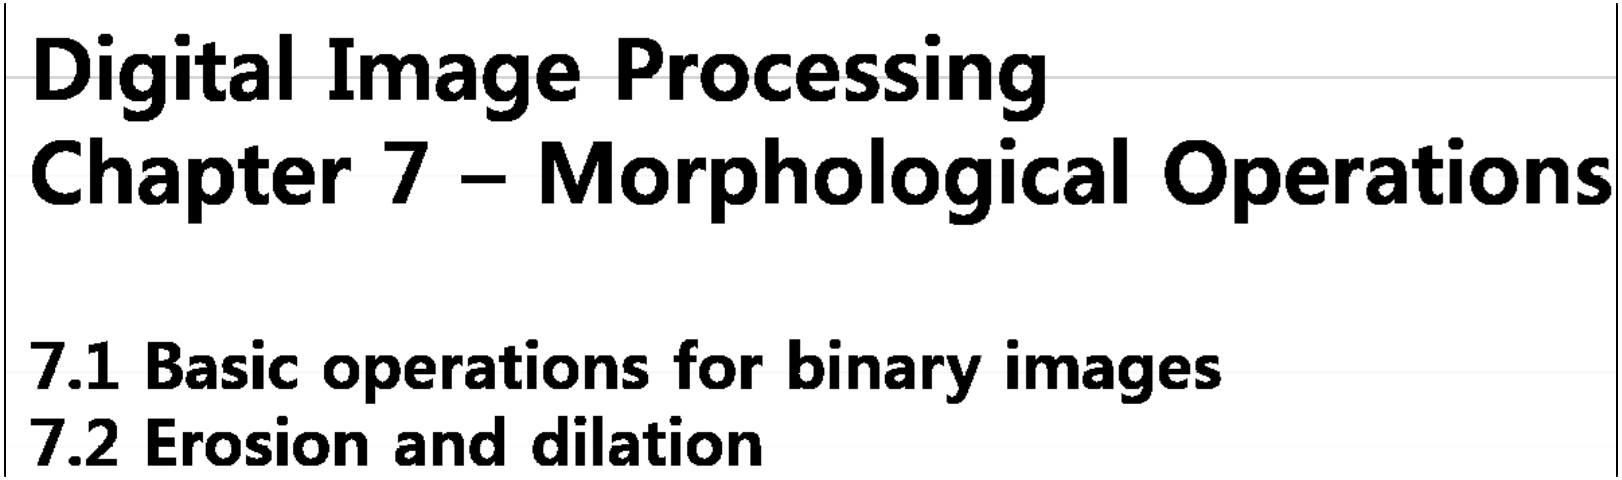

In [38]:
kernel = np.ones((3,1), np.uint8)
erosion= cv2.erode(dilate, kernel, iterations=1)
cv2_imshow(erosion)

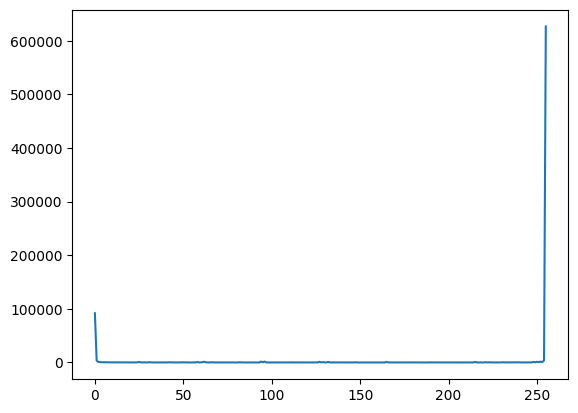

In [39]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

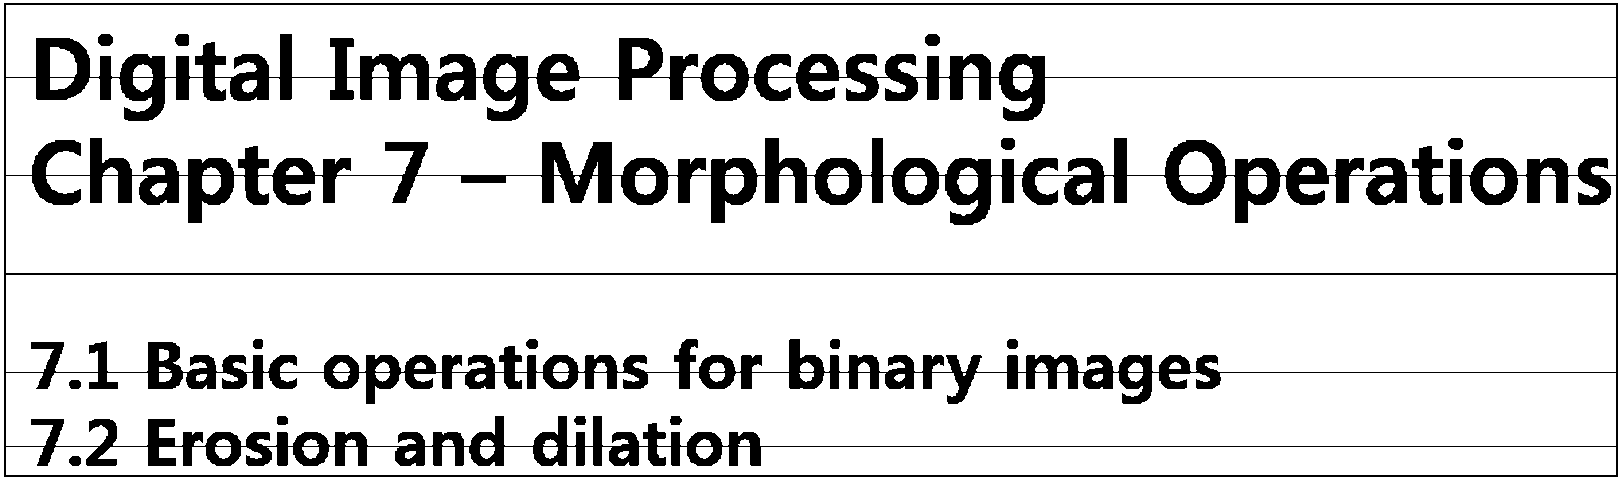

In [43]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.uint8)

threshold = 110

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if gImg[i][j] > threshold:
      gBin[i][j] = 255

cv2_imshow(gBin)

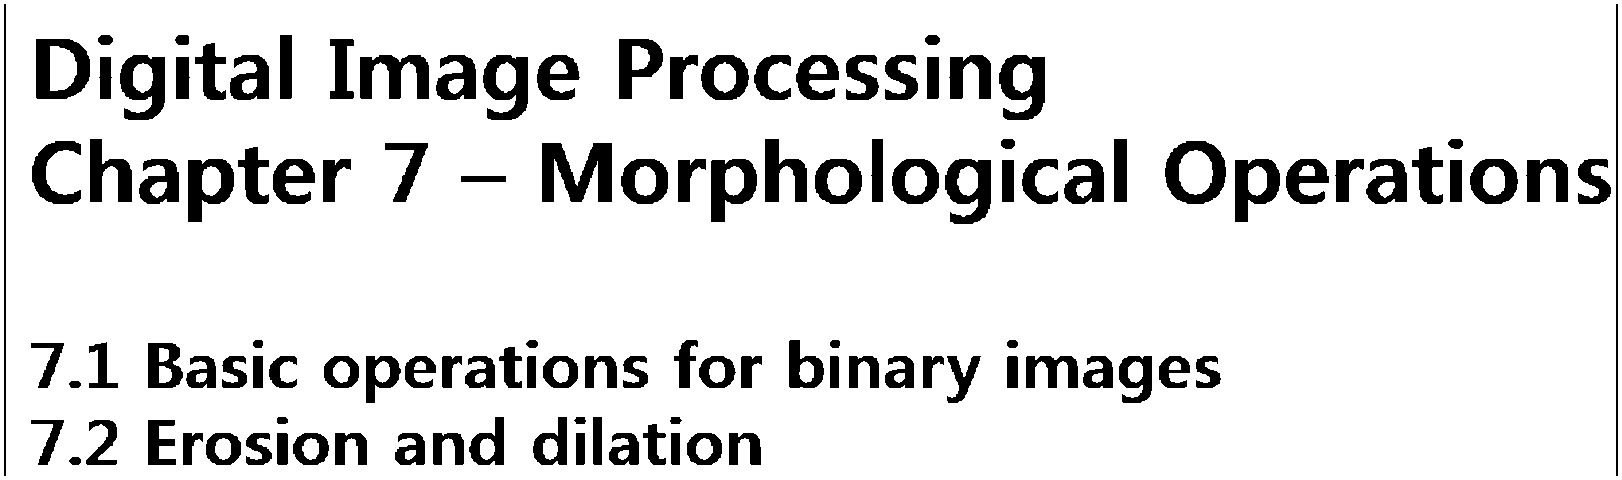

In [48]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gBin, kernel, iterations=1)
cv2_imshow(dilate)

### Removing Horizontal Lines

First, let's try to remove horizontal lines from the grayscale image. We'll use a rectangular kernel that is wide but short to detect and remove horizontal features.

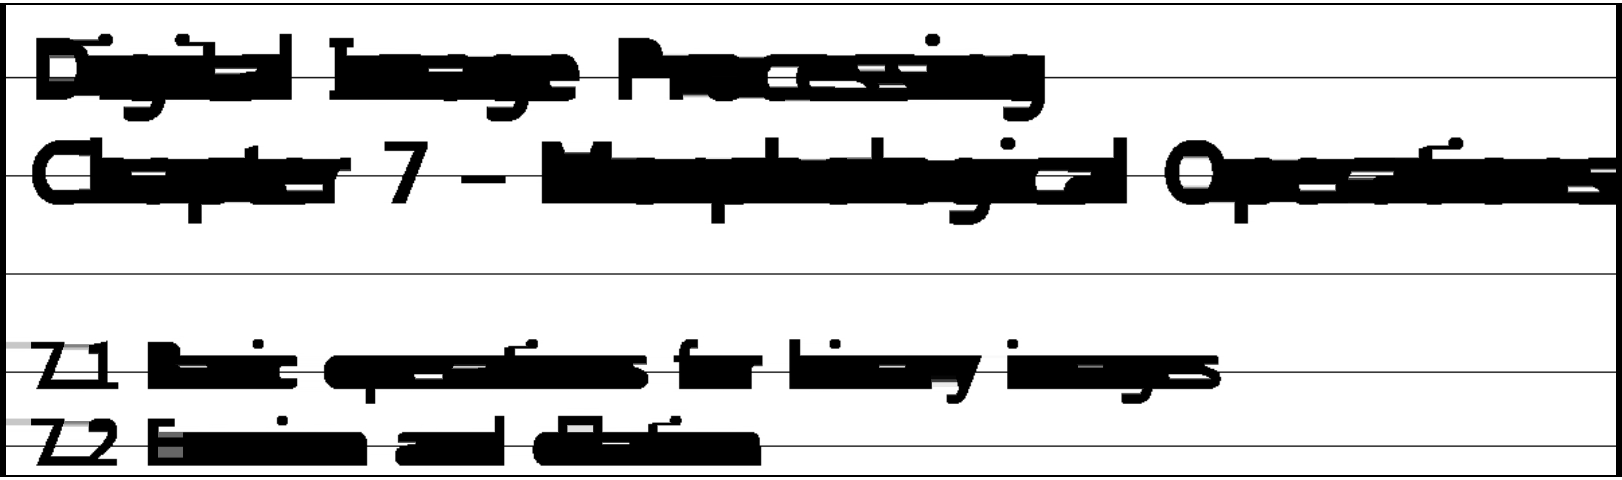

In [26]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
removed_horizontal_lines = cv2.morphologyEx(gImg, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
cv2_imshow(removed_horizontal_lines)

### Removing Vertical Lines

Now, let's remove vertical lines. For this, we'll use a kernel that is tall but narrow.

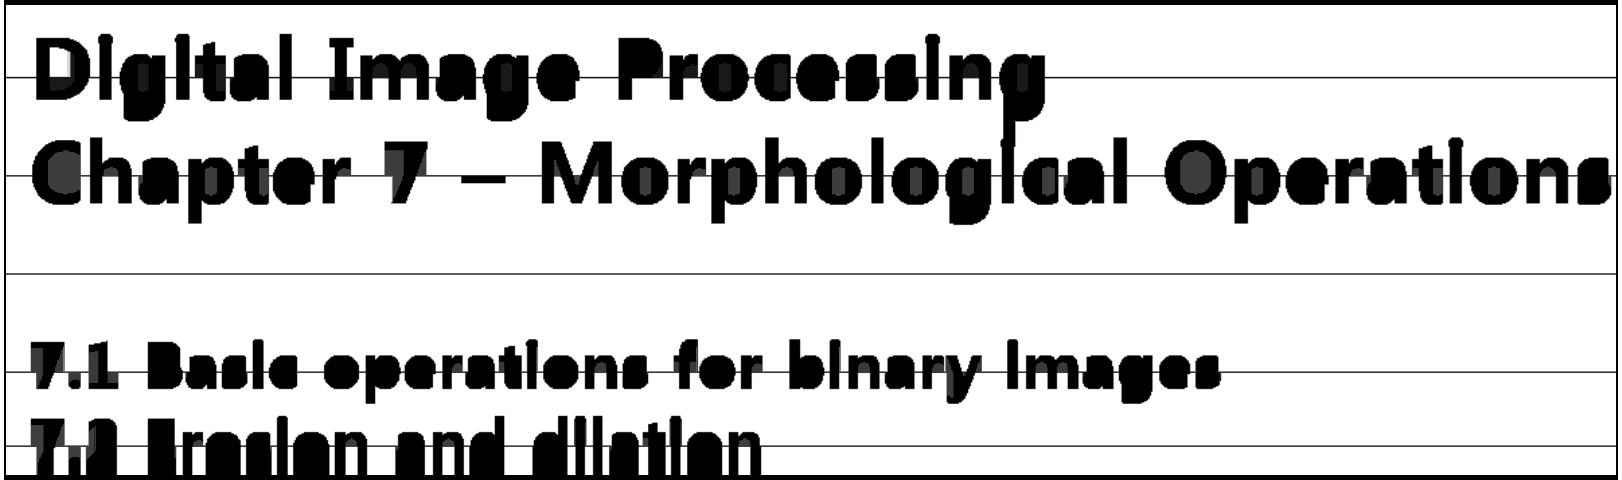

In [27]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))
removed_vertical_lines = cv2.morphologyEx(gImg, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
cv2_imshow(removed_vertical_lines)

### Removing Both Horizontal and Vertical Lines

To remove both types of lines, you can apply both operations sequentially or adjust the kernels for more aggressive removal. Here's an example of applying both:

If you want to remove both, you can apply both operations or use a larger rectangular kernel to target both horizontal and vertical lines more generally. A common approach is to perform the horizontal line removal, then vertical line removal on the result, or vice-versa.

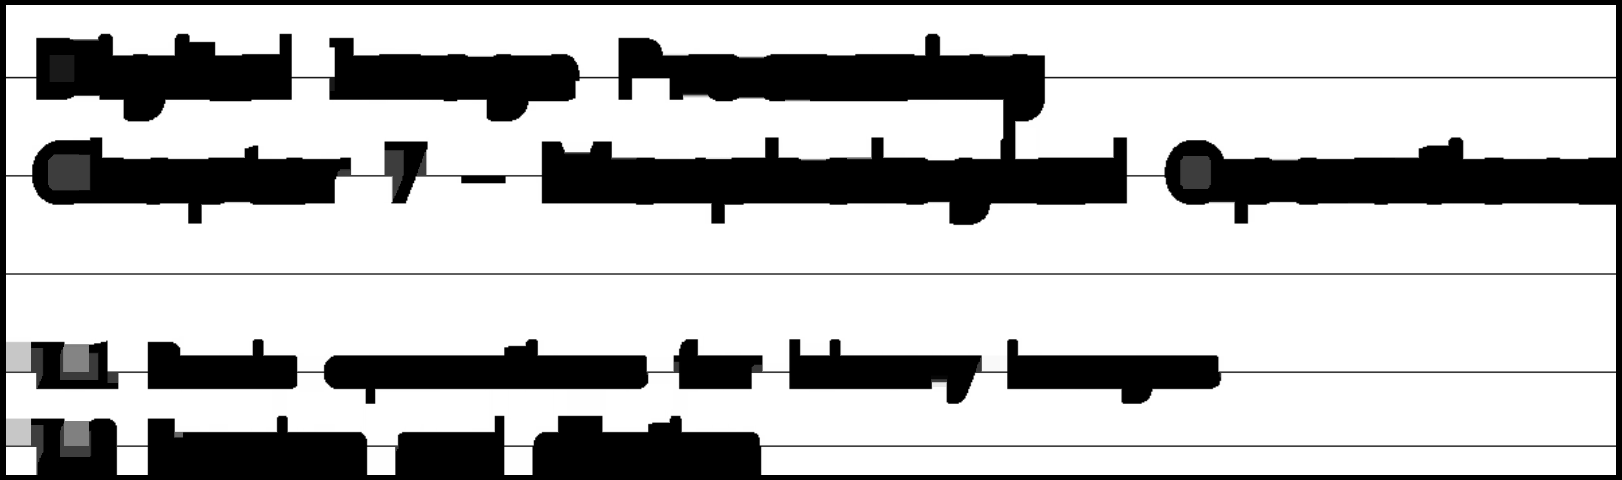

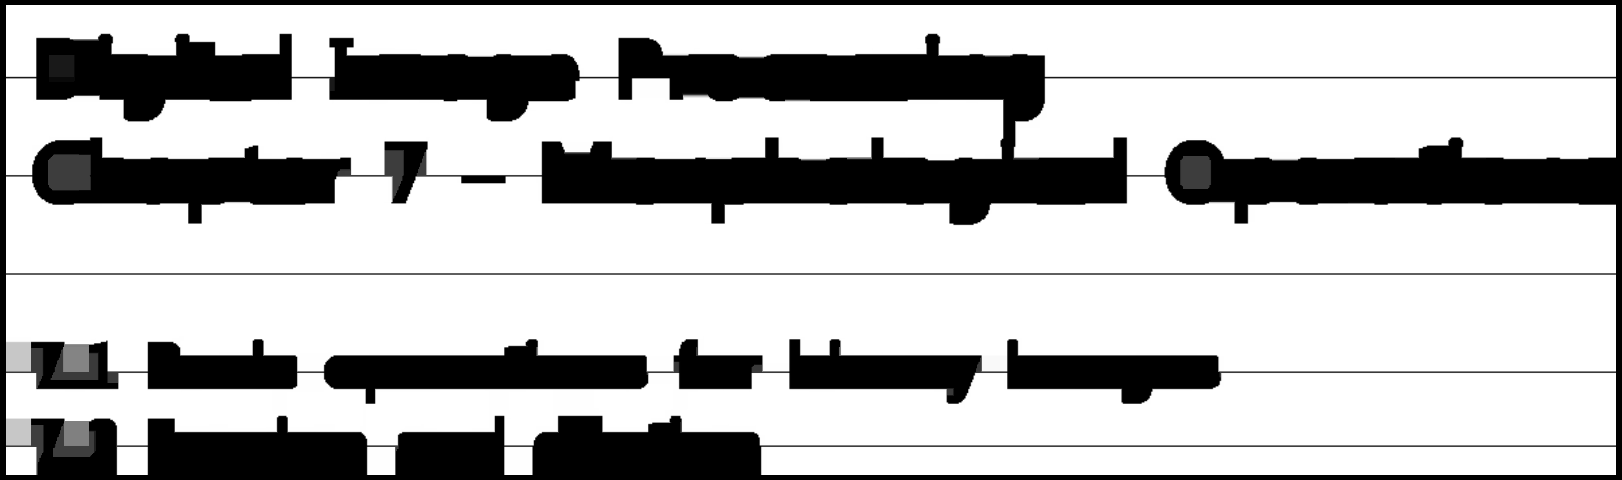

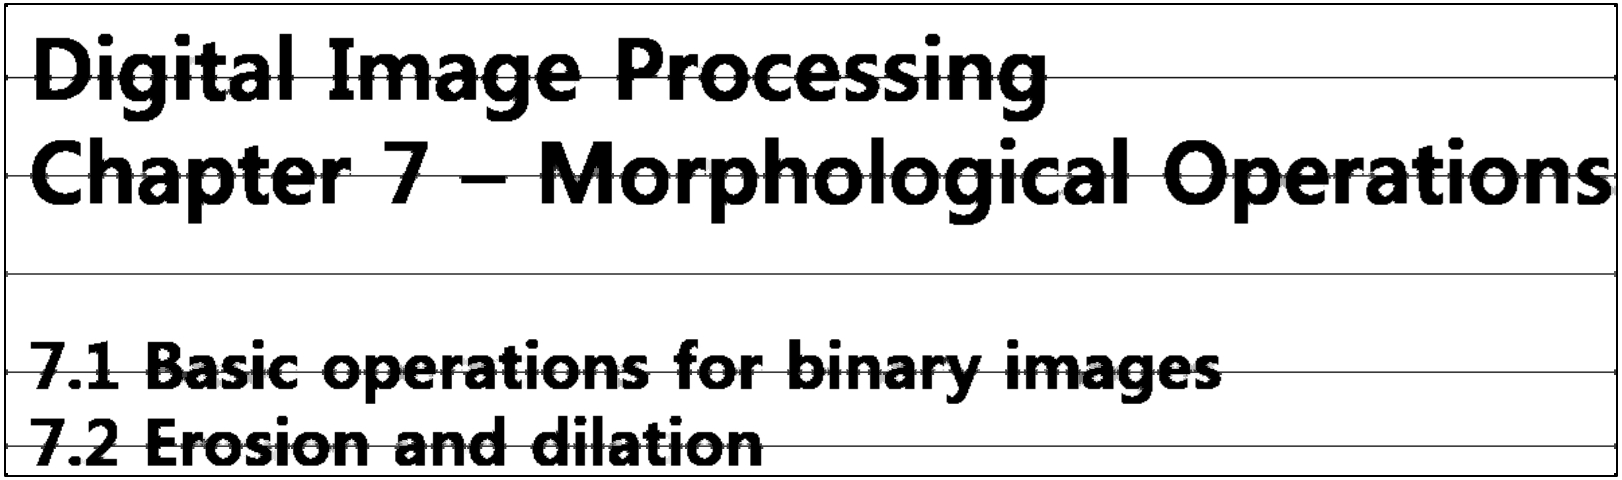

In [28]:
# Option 1: Apply horizontal then vertical removal
result_h_then_v = cv2.morphologyEx(gImg, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
result_h_then_v = cv2.morphologyEx(result_h_then_v, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
cv2_imshow(result_h_then_v)

# Option 2: Apply vertical then horizontal removal
result_v_then_h = cv2.morphologyEx(gImg, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
result_v_then_h = cv2.morphologyEx(result_v_then_h, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
cv2_imshow(result_v_then_h)

# Option 3: Using a cross-shaped kernel (can remove both but might affect other features)
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
removed_cross_lines = cv2.morphologyEx(gImg, cv2.MORPH_OPEN, cross_kernel)
cv2_imshow(removed_cross_lines)